# **Parking Occupancy Detection Using Convolutional Neural Networks**
#### **By:** Maria Isabel Arango, María José Bernal, Jose Alejandro Villamizar and Isabella Montoya

## 1. Libraries

In [ ]:
%pip install -r requirements.txt

In [55]:
import os
import random
import numpy as np
import seaborn as sns
import tensorflow as tf
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 2. Data loading and preprocessing

In [45]:
seed = 42
path = os.getcwd()
train_dir = f'{path}/CNRPark-Patches-150x150/A'
test_dir = f'{path}/CNRPark-Patches-150x150/B'

#feature training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.3)

#only rescaling but no transformations
test_datagen = ImageDataGenerator(rescale=1./255)

# Training set
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=seed
)

# Validation set
val_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False,
    seed=seed
)

# Test set
test_set = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 4320 images belonging to 2 classes.
Found 1851 images belonging to 2 classes.
Found 6413 images belonging to 2 classes.


## 3. CNN Model Arquitecture

In [5]:
def create_model(num_conv_layers=2, learning_rate=0.001):
    model = tf.keras.models.Sequential()

    # First convolutional layer
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    # Additional convolutional layers
    for i in range(1, num_conv_layers):
        model.add(tf.keras.layers.Conv2D(filters=32*(2**i), kernel_size=3, activation='relu'))
        model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    # Fully connected layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

### 3.1. Model hyperameter tuning

In [6]:
param_grid = {
    'num_conv_layers': [2, 4],  # Number of convolutional layers
    'learning_rate': [0.001, 0.00001],  # Learning rate
    'batch_size': [16, 64],  # Batch size
    'epochs': [10, 20]  # Number of epochs
}

In [7]:
results = []
combinations = list(product(*param_grid.values()))
print(f"Number of combinations to test: {len(combinations)}")

Number of combinations to test: 16


In [ ]:
for i, (num_conv_layers, lr, batch_size, epochs) in enumerate(combinations):
    print(f"\nCombination {i+1}/{len(combinations)}:")
    print(f"Convolutional layers: {num_conv_layers}, LR: {lr}, Batch: {batch_size}, Epochs: {epochs}")
    
    # Create data generators with the current batch_size
    # Training set
    train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary',
        subset='training',
        shuffle=True,
        seed=seed
    )

    # Validation set
    validation_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary',
        subset='validation',
        shuffle=False,
        seed=seed
    )

    # Create and train the model
    model = create_model(num_conv_layers=num_conv_layers, learning_rate=lr)
    history = model.fit(
        x=train_set,
        validation_data=validation_set,
        epochs=epochs,
        verbose=0) 

    # Obtain final training and validation accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]

    # Save results
    results.append({
        'num_conv_layers': num_conv_layers,
        'learning_rate': lr,
        'batch_size': batch_size,
        'epochs': epochs,
        'train_accuracy': final_train_acc,
        'val_accuracy': final_val_acc,
        'history': history
    })
    
    print(f"Results - Train Acc: {final_train_acc:.4f}, Val Acc: {final_val_acc:.4f}")

In [ ]:
best_result = max(results, key=lambda x: x['val_accuracy'])
print("\nBest found combination:")
print(f"Convolutional layers: {best_result['num_conv_layers']}")
print(f"Learning rate: {best_result['learning_rate']}")
print(f"Batch size: {best_result['batch_size']}")
print(f"Number of epochs: {best_result['epochs']}")
print(f"Validation accuracy: {best_result['val_accuracy']:.4f}")

### 3.2. Best Model Results

In [31]:
# Hyperparameters
num_conv_layers = 4
learning_rate = 0.00001
batch_size = 64
epochs = 20

In [32]:
# Train set
train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary',
        subset='training',
        shuffle=True,
        seed=seed
    )

# Validation set
validation_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False,
    seed=seed
)

Found 4320 images belonging to 2 classes.


Found 1851 images belonging to 2 classes.


In [33]:
# Crear y entrenar el modelo
model = create_model(num_conv_layers, learning_rate)
history = model.fit(
        x=train_set,
        validation_data=validation_set,
        epochs=epochs,
        verbose=0) 

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [58]:
# Obtener métricas finales
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.9954
Final Training Loss: 0.0216
Final Validation Accuracy: 0.9833
Final Validation Loss: 0.0419


#### 3.2.1. Accuracy and Loss Plots

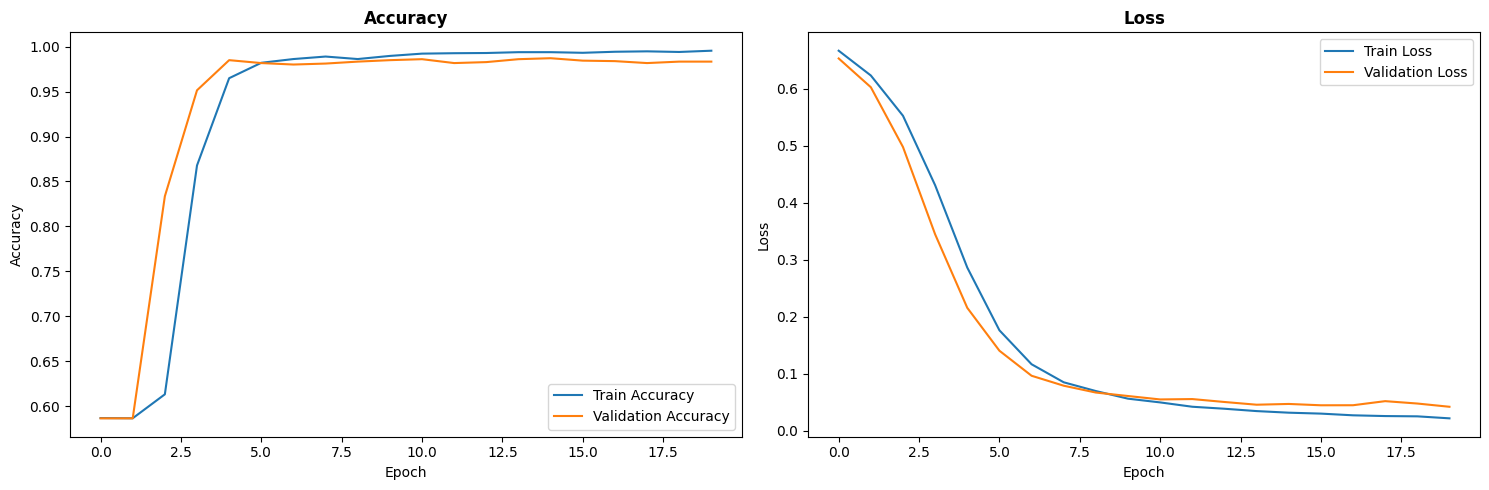

In [35]:
plt.figure(figsize=(15, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### 3.2.2. Test Set Evaluation

In [47]:
# Test set
test_set = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        shuffle=False)

Found 6413 images belonging to 2 classes.


In [48]:
test_loss, test_accuracy = model.evaluate(test_set, verbose=1)
print(f"Final Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9082 - loss: 0.2587
Final Test Accuracy: 0.8603
Final Test Loss: 0.4664


#### 3.2.3. Visualize Classification

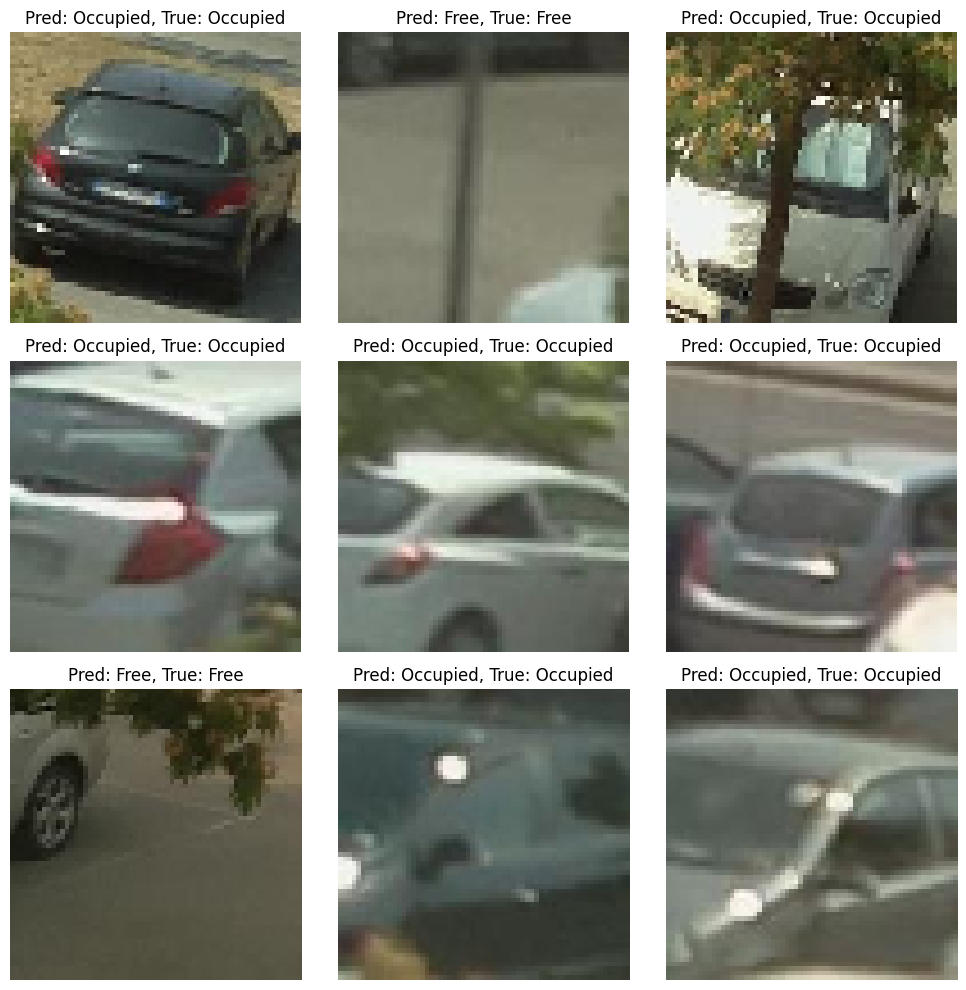

In [57]:
# Reset the generator to start from beginning
test_set.reset()

# Collect all images and labels
images = []
labels = []
for i in range(len(test_set)):
    img_batch, label_batch = test_set[i]
    images.extend(img_batch)
    labels.extend(label_batch)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Select random indices
random_indices = random.sample(range(len(images)), 9)

# Plot random test images with predictions
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    img = np.expand_dims(images[idx], axis=0)  # Expand dims to match model input
    pred = model.predict(img, verbose=0)
    pred_label = "Free" if pred[0][0] >= 0.5 else "Occupied"
    true_label = "Free" if labels[idx] == 1 else "Occupied"

    plt.subplot(3, 3, i + 1)
    plt.imshow(images[idx])
    plt.title(f"Pred: {pred_label}, True: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


#### 3.2.4. Confusion Matrix

201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step


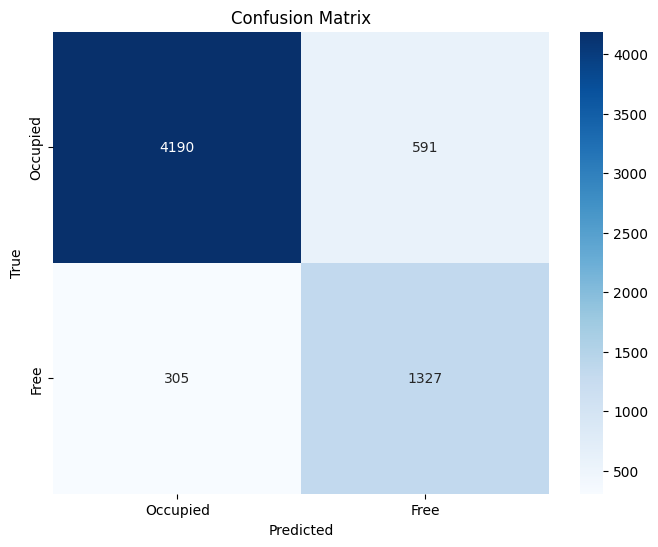

In [ ]:
y_true = test_set.classes
y_pred = model.predict(test_set, verbose=1)
y_pred = (y_pred >= 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Occupied', 'Free'], yticklabels=['Occupied', 'Free'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()